In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Replace with your file path
fileNameCSV = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
#fileNameCSV = "WholeDataAsNumbers.csv"
try:
    # Attempt to read the CSV file into a DataFrame
    df = pd.read_csv(fileNameCSV)
except PermissionError:
    print(f"PermissionError: You do not have permission to read the file '{fileNameCSV}'.")
except FileNotFoundError:
    print(f"FileNotFoundError: The file '{fileNameCSV}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")

print("Dataset dimensions:", df.shape)

#print(df.info())
print(df.columns)

Dataset dimensions: (1470, 35)
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


1. Preprocess the Dataset

In [18]:
#Encode Categorical Variables:
#df = pd.get_dummies(df, drop_first=True)
#Encode Categorical Variables:
df = pd.get_dummies(df, drop_first=True)
#Standardize the Data:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
target_column = [col for col in df.columns if col.startswith('Attrition')][0]
data_scaled = scaler.fit_transform(df.drop(target_column, axis=1))



2. Handle the Class Imbalance

In [19]:
#Smote
from imblearn.over_sampling import SMOTE

X = df.drop(target_column, axis=1)
y = df[target_column]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())


Before SMOTE: Attrition_Yes
False    1233
True      237
Name: count, dtype: int64
After SMOTE: Attrition_Yes
True     1233
False    1233
Name: count, dtype: int64


3. Explore the Data

Age                                 -0.159205
DailyRate                           -0.056652
DistanceFromHome                     0.077924
Education                           -0.031373
EmployeeCount                             NaN
EmployeeNumber                      -0.010577
EnvironmentSatisfaction             -0.103369
HourlyRate                          -0.006846
JobInvolvement                      -0.130016
JobLevel                            -0.169105
JobSatisfaction                     -0.103481
MonthlyIncome                       -0.159840
MonthlyRate                          0.015170
NumCompaniesWorked                   0.043494
PercentSalaryHike                   -0.013478
PerformanceRating                    0.002889
RelationshipSatisfaction            -0.045872
StandardHours                             NaN
StockOptionLevel                    -0.137145
TotalWorkingYears                   -0.171063
TrainingTimesLastYear               -0.059478
WorkLifeBalance                   

<Axes: xlabel='Attrition_Yes', ylabel='MonthlyIncome'>

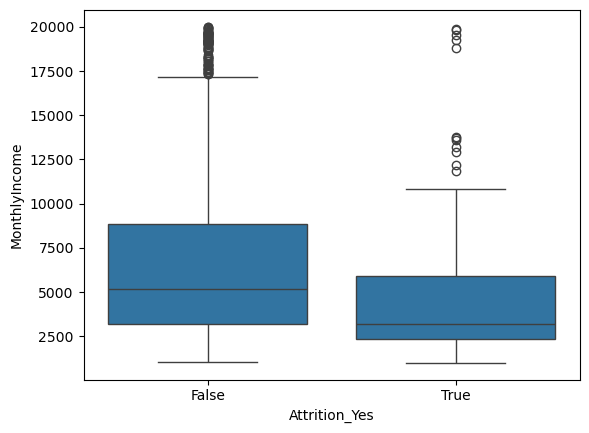

In [20]:
#Correlation Analysis:
correlation_matrix = df.corr()
print(correlation_matrix[target_column])
#EDA (Exploratory Data Analysis):
import seaborn as sns
sns.boxplot(x=target_column, y='MonthlyIncome', data=df)
#sns.barplot(x=target_column, y='OverTime', data=df)


4. Feature Selection

In [21]:
#Use statistical and machine learning techniques to identify important features:
#Random Forest:
print("Random Forest:")
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))
print("Logistic Regression Coefficients:")

#Logistic Regression Coefficients:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_resampled, y_resampled)
print(pd.Series(lr.coef_[0], index=X.columns).sort_values(ascending=False))


Random Forest:
StockOptionLevel                     0.061459
JobSatisfaction                      0.048595
MonthlyIncome                        0.048063
JobLevel                             0.043023
Department_Research & Development    0.042961
JobInvolvement                       0.038422
EnvironmentSatisfaction              0.035116
MonthlyRate                          0.034573
TotalWorkingYears                    0.034458
EmployeeNumber                       0.033704
DistanceFromHome                     0.032997
YearsWithCurrManager                 0.032692
MaritalStatus_Married                0.032385
HourlyRate                           0.032022
Age                                  0.031659
DailyRate                            0.031380
EducationField_Medical               0.030392
YearsInCurrentRole                   0.030379
RelationshipSatisfaction             0.027395
YearsAtCompany                       0.027219
TrainingTimesLastYear                0.023335
EducationField_Life

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5. Build Predictive Models

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_resampled, y_resampled)
y_pred = gbc.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.93      0.98      0.96       369
        True       0.98      0.93      0.95       371

    accuracy                           0.95       740
   macro avg       0.96      0.95      0.95       740
weighted avg       0.96      0.95      0.95       740

